## Implementing Neural Network

### Importing Data

     sepal_length  sepal_width  petal_length  petal_width         species
143           6.8          3.2           5.9          2.3  Iris-virginica
11            4.8          3.4           1.6          0.2     Iris-setosa
28            5.2          3.4           1.4          0.2     Iris-setosa
110           6.5          3.2           5.1          2.0  Iris-virginica
126           6.2          2.8           4.8          1.8  Iris-virginica
['Iris-virginica' 'Iris-setosa' 'Iris-versicolor']


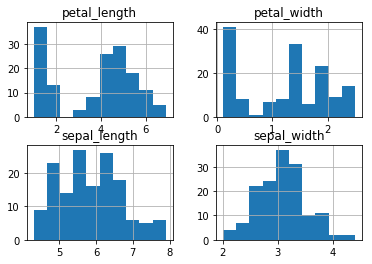

In [4]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# Read in dataset
iris = pandas.read_csv("iris.csv")

# Shuffle Rows
shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows,:]

print(iris.head())

# Get unique species
print(iris.species.unique())

iris.hist()
plt.show()

### Creating Neurons
#### In a data with large amount of non-linearity, we can neither use linear or logistic regression.
#### For such a dataset, we need Neural Networks.
#### Neural Networks needs activation units, called neurons, to make prediction of some outcome. 
#### Neurons take in some input, apply a transformation function, and return an output.
#### The units of a neuron are then fed into an activation function h. We will use the classic Sigmoid function, g(z)=1/(1+e^(-z))
#### The sigmoid function then leads to a Sigmoid activation function.
#### This is what we will be implementing in the following cell.

In [10]:
# Using dot operator for matrix multiplication
def sigmoid_activation(x,theta):
    x = np.asarray(x)
    theta = np.asarray(theta)
    return 1/(1 + np.exp(-np.dot(theta.T,x)))

# Variables to test Sigmoid function
iris["ones"] = np.ones(iris.shape[0])
X = iris[['ones','sepal_length','sepal_width','petal_length','petal_width']].values
y = (iris.species == 'Iris-versicolor').values.astype(int)

x0 = X[0]

# Initiate theta randomly
theta_init = np.random.normal(0,0.01,size=(5,1))

a1 = sigmoid_activation(x0,theta_init)
print(a1)

[ 0.4652341]


### Cost Function
#### Cost function helps us measure the difference between the desired and actual output.
#### The lower the cost function, the more accurate is our model.
#### We will create a function singlecost, which will use input features X, targets y and parameters theta to compute the cost function.
#### And assign the cost to the variable first_cost.

In [12]:
# We will first just test on the first values of the feature and target

x0 = X[0]
y0 = y[0]

# Initializing parameters of 5 units and just 1 layer
theta_init = np.random.normal(0,0.01,size=(5,1))

def singlecost(X,y,theta):
    # Activation computation
    h = sigmoid_activation(X.T, theta)
    # Getting the cost function through -ve average of target*log(activation) + (1-target)*log(1-activation)
    cost = - np.mean(y * np.log(h) + (1-y) * np.log(1-h))
    return cost

first_cost = singlecost(x0, y0, theta_init)
print(first_cost)

0.645516204974


### Computing the Gradients
#### Getting partial derivatives of the cost functions using chain rule.
#### 1. Computed error between target variable and prediction
#### 2. Compute sensitivity relative to each parameter.
#### Assigning average gradients to variable grads.

In [14]:
# Initialize parameters
theta_init = np.random.normal(0,0.01, size=(5,1))

# Array for storing updates
grads = np.zeros(theta_init.shape)

# Getting number of observations
n = X.shape[0]

for j,obs in enumerate(X):
    # Compute activation
    h = sigmoid_activation(obs,theta_init)
    # Get delta
    delta = (y[j]-h) * h * (1-h) * obs
    # Accumulate
    grads += delta[:,np.newaxis]/X.shape[0]

### Two Layer Network
#### We can use Gradient Descent to learn parameters and making predictions.
#### Gradient Descent minimizes the cost function by subtracting the product of gradients and the learning rate from previous parameters.
#### We will keep on repeating this step until cost function converges or maximum number of iterations is reached.
#### We are implementing the whole thing in the function learn.

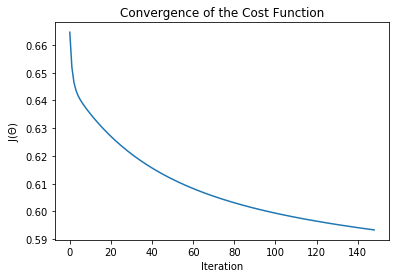

In [17]:
theta_init = np.random.normal(0,0.01,size=(5,1))

# Set the learning rate, it is a multiplying parmeter to decrease the cost function until it reaches a minimum.
learning_rate = 0.1

# Maximum number of iterations for Gradient Descent
maxepochs = 10000

# Cost convergence threshold i.e. (prevcost - cost) > convergence_thres
convergence_thres = 0.0001

def learn(X, y, theta, learning_rate, maxepochs, convergence_thres):
    costs=[]
    cost = singlecost(X, y, theta) # Compute initial cost
    costprev = cost + convergence_thres + 0.01 # Set of initial costprev to past while loop
    counter = 0 # Counter
    #Loop until convergence
    for counter in range(maxepochs):
        grads = np.zeros(theta.shape)
        for j,obs in enumerate(X):
            h = sigmoid_activation(obs, theta) # Compute activation
            delta = (y[j]-h) * h * (1-h) * obs # Get Delta
            grads += delta[:,np.newaxis]/X.shape[0] # Accumulate
            
        # Update Parameters
        theta += grads * learning_rate
        counter += 1 # Count increment
        costprev = cost # Store previous cost
        cost = singlecost(X, y, theta) # Compute new cost
        costs.append(cost)
        if np.abs(costprev-cost) < convergence_thres:
            break
            
    plt.plot(costs)
    plt.title("Convergence of the Cost Function")
    plt.ylabel("J($\Theta$)")
    plt.xlabel("Iteration")
    plt.show()
    return theta

theta = learn(X, y, theta_init, learning_rate, maxepochs, convergence_thres)

### Neural Network
#### Neural Networks are usually built on multiple layers of neurons
#### Adding more layers makes it learn more complex functions.
#### One layer inputs their output to the next layer, which does the same for the next layer.
#### We will do the same in feedforward function.

In [20]:
theta0_init = np.random.normal(0,0.01,size=(5,4))
theta1_init = np.random.normal(0,0.01,size=(5,1))

def feedforward(X, theta0, theta1):
    # First Layer
    a1 = sigmoid_activation(X.T, theta0).T
    # Adding column of ones for bias term i.e. the first activation unit
    a1 = np.column_stack([np.ones(a1.shape[0]),a1])
    # Activation units are then inputted to the output layer
    out = sigmoid_activation(a1.T, theta1)
    return out

h = feedforward(X, theta0_init, theta1_init)

### Multiple Nueral Network Cost Function
#### Cost function for multiple layer Neural Network is similar to the one we used above, but just slightly complicated.
#### Creating the same in function multiplecost().

In [24]:
# X, y, theta1, theta1 are already present.

def multiplecost(X, y, theta0, theta1):
    # Feed through network
    h = feedforward(X, theta0, theta1)
    # Compute Error
    inner = y * np.log(h) + (1-y) * np.log(1-h)
    # Negative of average error
    return -np.mean(inner)

theta0_init = np.random.normal(0,0.01,size=(5,4))
theta1_init = np.random.normal(0,0.01,size=(5,1))

c = multiplecost(X, y, theta0_init, theta1_init)
print("Cost = ",c)

Cost =  0.689299699748


### Backpropagation
#### We have created multiple layers of parameters to learn and have implemented forward propogation by feeding data through each layer and returning an output.
#### Backpropogation focuses on updating parameters starting at last layer and circling back through each layer, updating accordingly.
#### This allows each neuron to have an error value associated with itself, which is basically the difference between the desired output and the achieved output.
#### With the help of this Error value, the weight of each neuron is updated so that its contribution to the final prediction becomes more accurate.
#### We are using a complete class to define our 3 layer neural network, with all the functions written above included in it.

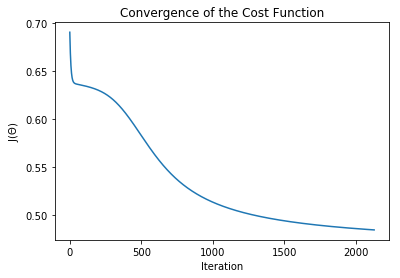

In [29]:
class NNet3:
    def __init__(self, learning_rate=0.5, maxepochs=1e4, convergence_thres=1e-5, hidden_layer=4):
        self.learning_rate = learning_rate
        self.maxepochs = int(maxepochs)
        self.convergence_thres = 1e-5
        self.hidden_layer = int(hidden_layer)
        
    def _multiplecost(self, X, y):
        # Feed through network
        l1, l2 = self._feedforward(X)
        # Compute error
        inner = y * np.log(l2) + (1-y) * np.log(1-l2)
        # Negative of average error
        return -np.mean(inner)
    
    def _feedforward(self, X):
        # Feedforward to the first layer
        l1 = sigmoid_activation(X.T, self.theta0).T
        # Adding column of 1s for Bias Term
        l1 = np.column_stack([np.ones(l1.shape[0]), l1])
        #  Activation units are then outputted to the Output Layer
        l2 = sigmoid_activation(l1.T, self.theta1)
        return l1, l2
    
    def predict(self, X):
        _, y = self._feedforward(X)
        return y
    
    def learn(self, X, y):
        nobs, ncols = X.shape
        self.theta0 = np.random.normal(0, 0.01, size=(ncols, self.hidden_layer))
        self.theta1 = np.random.normal(0, 0.01, size=(self.hidden_layer+1,1))
        
        self.costs = []
        cost = self._multiplecost(X, y)
        self.costs.append(cost)
        # Setting initial costprev
        costprev = cost + self.convergence_thres + 1
        counter = 0 # Initialize counter
        
        # Loop until convergence
        for counter in range(self.maxepochs):
            # Feedforward through network
            l1, l2 = self._feedforward(X)
            
            # Start backpropagation
            # Computer gradients
            l2_delta = (y-l2) * l2 * (1-l2)
            l1_delta = l2_delta.T.dot(self.theta1.T) * l1 * (1-l1)
            
            # Update parameters by averaging gradients and multiplying with the learning rate
            self.theta1 += l1.T.dot(l2_delta.T) / nobs * self.learning_rate
            self.theta0 += X.T.dot(l1_delta)[:,1:] / nobs * self.learning_rate
            
            # Store costs and checks for convergence
            counter += 1
            costprev = cost # store previous cost
            cost = self._multiplecost(X, y) # Get next cost
            self.costs.append(cost)
            if np.abs(costprev-cost) < self.convergence_thres and counter > 500:
                break
                
# Set learning rate
learning_rate = 0.5

# Max number of iterations for gradient descent
maxepochs = 10000

# Costs convergence threshold, i.e. (prevcost - cost) > convergence_thres
convergence_thres = 0.00001

# Number of hidden units
hidden_units = 4

# Initialize model
model = NNet3(learning_rate = learning_rate, maxepochs=maxepochs,
              convergence_thres = convergence_thres, hidden_layer = hidden_units)

# Train the model
model.learn(X, y)

# Plot costs
plt.plot(model.costs)
plt.title("Convergence of the Cost Function")
plt.ylabel("J($\Theta$)")
plt.xlabel("Iteration")
plt.show()

### Splitting Data
#### After implementing a Neural Network and testing its cost function, we can test it by splitting our data into training and test datasets.

In [31]:
# Train will occupy the first 70 rows
# Test will occupy the last 30 rows

X_train = X[:70]
y_train = y[:70]

X_test = X[-30:]
y_test = y[-30:]

### Predicting Iris flowers
#### We will calculate the AUC (Area Under the Curve) for the predictions returned by our Neural Network.
#### We will focus on the first row of the predictions matrix returned by the predict function, which contains the type of flower.
#### This will be our target variable.
#### We will calculate the AUC score using scikit learn.

In [34]:
from sklearn.metrics import roc_auc_score

learning_rate = 0.5

maxepochs = 10000

convergence_thres = 0.00001

hidden_units = 4

model = NNet3(learning_rate = learning_rate, maxepochs = maxepochs, 
             convergence_thres = convergence_thres, hidden_layer = hidden_units)

model.learn(X_train, y_train)

yhat = model.predict(X_test)[0]

auc = roc_auc_score(y_test, yhat)
print("Score = ", auc)

Score =  0.428571428571


#### This is not a good score. The score should be within the range of 0 to 1 and should be as far away from 0.5 as possible.

In [40]:
print(yhat)

[ 0.09167752  0.03822576  0.4972514   0.04089059  0.02815855  0.49618096
  0.03689112  0.49009291  0.49656147  0.48892937  0.49545543  0.49697154
  0.49713651  0.49713791  0.49234016  0.0185853   0.49121655  0.49392488
  0.04826644  0.49476376  0.04608774  0.49472779  0.49688489  0.49101864
  0.03621085  0.49650398  0.49240266  0.49651289  0.49712315  0.49675136]


In [39]:
print(y_test)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0]


### Conclusion:-
#### The reason why our Neural Network is not performing well is because it has a very low distinguishing value between the different species of iris flowers.
#### We can see this in the yhat array, where NO prediction is above the 50% mark.
#### Changes can be made to make the Neural Network adapt to more complex functions.
#### The smaller size of the data can also be a factor for the lower accuracy.